# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 提出问题

**问题**：
>  1、那种类型的app更加受用户欢迎，评分更高？
>  
>  2、最受欢迎（下载量最高）的 Apps 有什么特征？

## 数据评估和清理

In [1]:
# 确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
# Load pacakges
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('googleplaystore.csv')

In [4]:
# Check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Clean the data.
# I think columns:("Current Ver","Last Updated","Reviews") are unimportant, so I droped them.
df_clean = df.copy()
df_clean.drop(["Current Ver","Last Updated","Reviews","Installs","Size","Price","Genres","Android Ver"],inplace=True,axis=1)
df_clean.drop(df_clean.query('Rating < 4.0').index,inplace=True)
df_clean.dropna(how="any",inplace=True)
df_clean.drop_duplicates(inplace=True)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6371 entries, 0 to 10840
Data columns (total 5 columns):
App               6371 non-null object
Category          6371 non-null object
Rating            6371 non-null float64
Type              6371 non-null object
Content Rating    6371 non-null object
dtypes: float64(1), object(4)
memory usage: 298.6+ KB


## 数据探索分析
#### 1、去除用户评分低于4.1的数据。
#### 2、基于此绘制饼图，分析各列（Category，Type，Content Rating）下，各项所占比例。

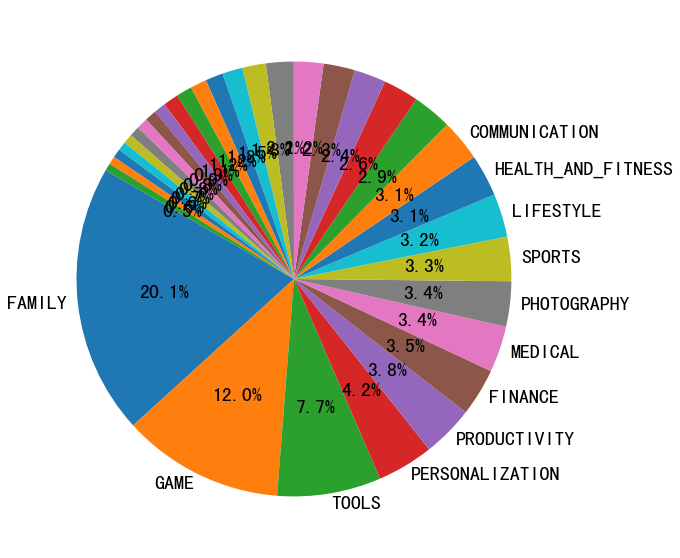

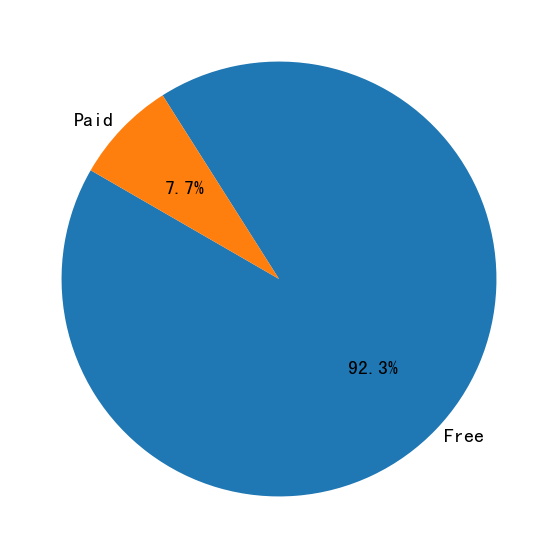

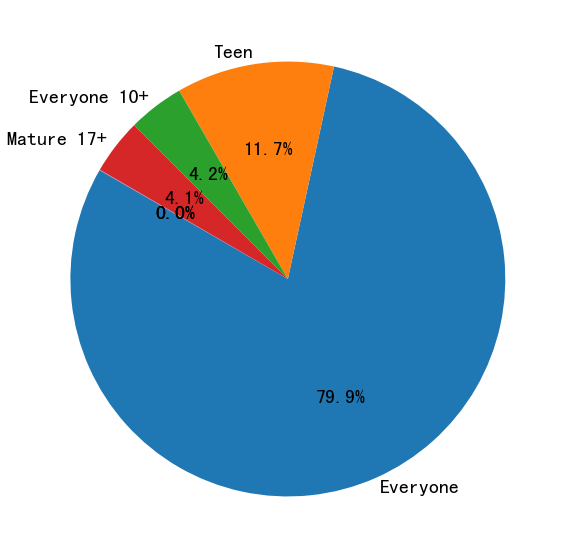

In [54]:
for item in ["Category","Type","Content Rating"]:
    plt.figure(figsize=(20,10))
    serise = df_clean[item].value_counts()
    x = serise.index.tolist()
    y = serise.tolist()
    if item != "Type":
        for i,j in enumerate(y):
            if (j / 6372) < 0.03:
                x[i] = ""
    plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,labeldistance=1.05,pctdistance=0.6,textprops={'fontsize':20})
    plt.show()

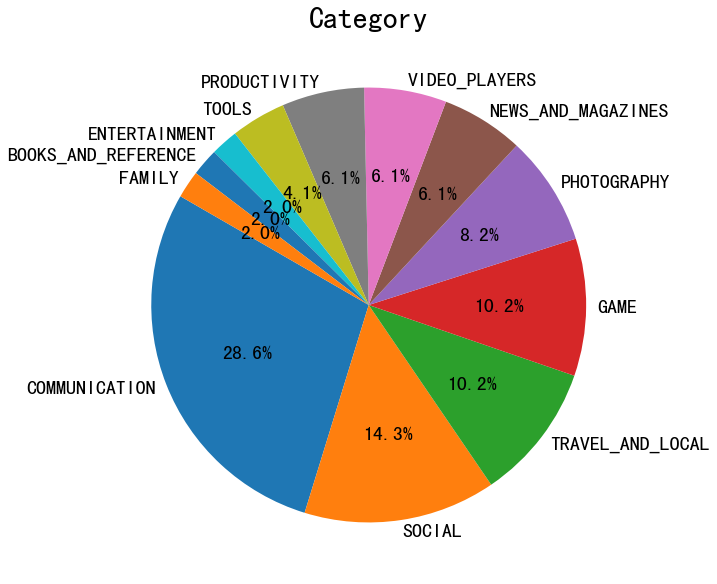

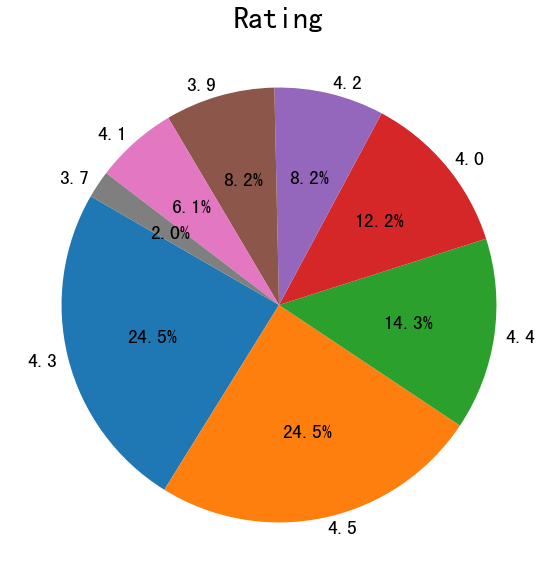

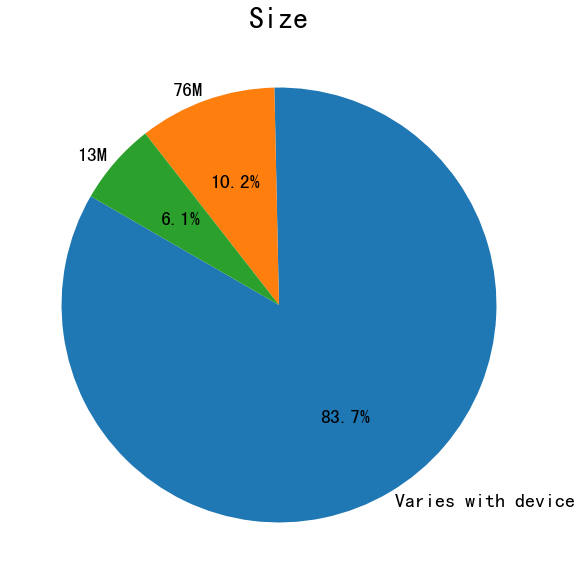

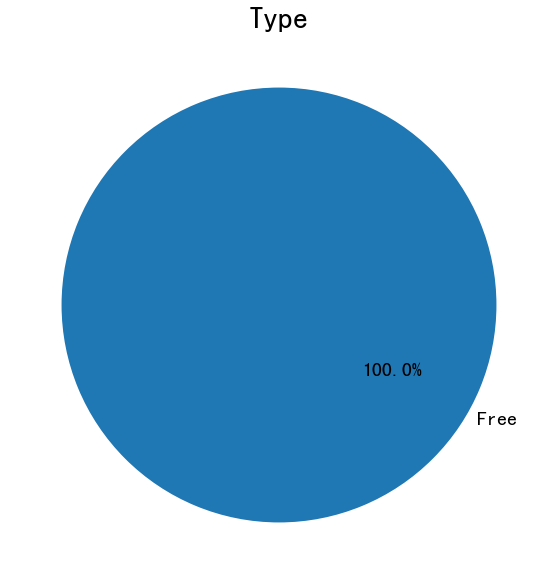

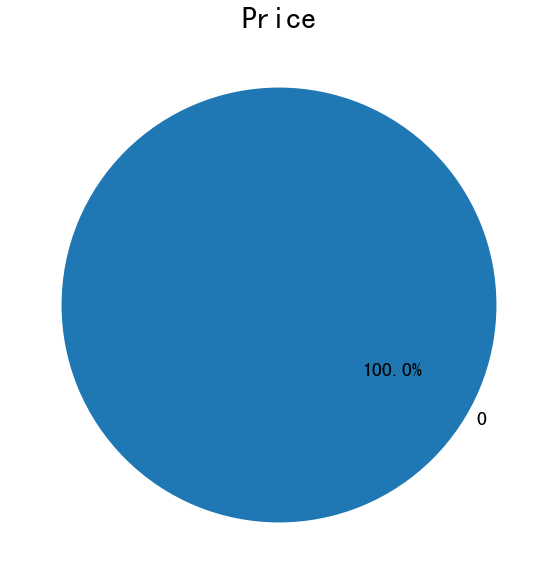

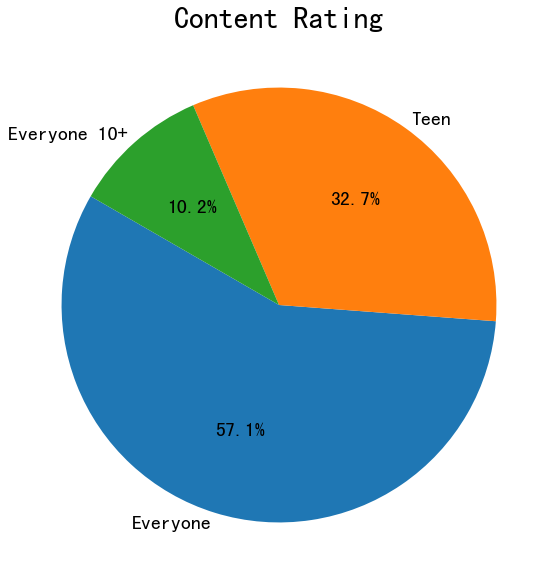

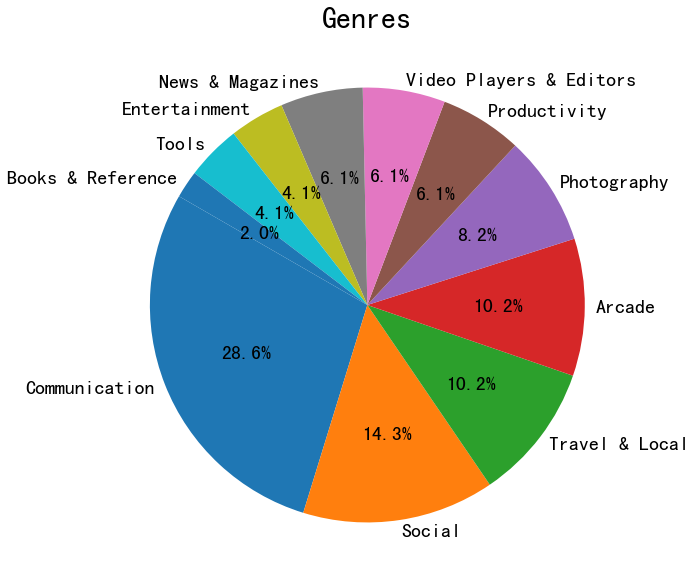

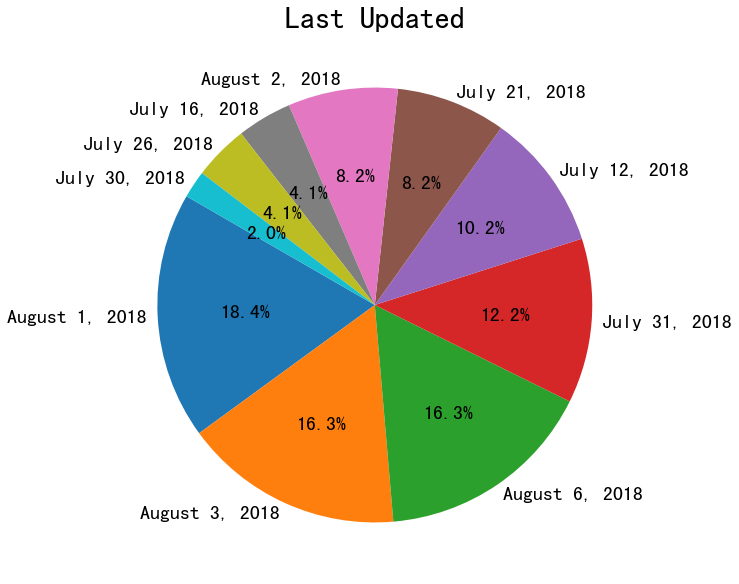

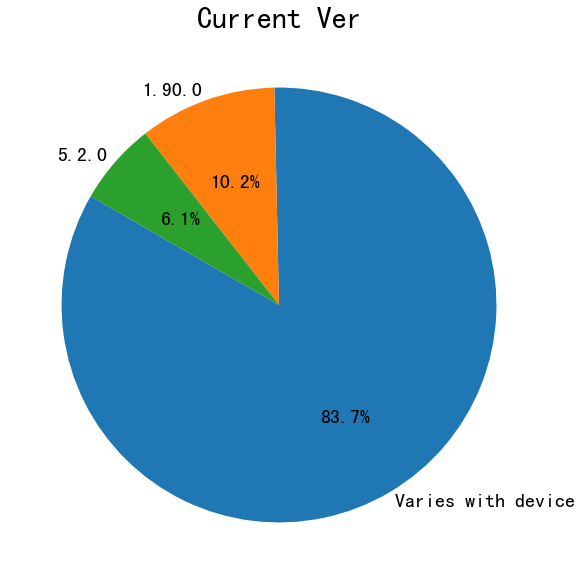

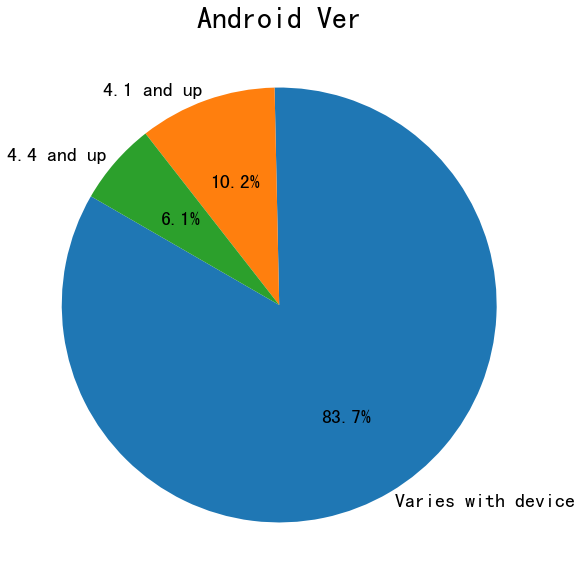

In [56]:
df_clean2 = df.copy()
df_clean2.dropna(how="any",inplace=True)
df_clean2.drop_duplicates(inplace=True)
df_clean2["Installs"].replace(regex=r'\+|\,', value="",inplace=True)
df_clean2["Installs"] = df_clean2["Installs"].astype('int64')
df_clean2.drop(df_clean2.query('Installs < 1000000000').index,inplace=True)
columns = df_clean2.columns.values.tolist()
columns.remove('App')
columns.remove('Reviews')
columns.remove('Installs')
for item in columns:
    plt.figure(figsize=(20,10))
    serise = df_clean2[item].value_counts()
    x = serise.index.tolist()
    y = serise.tolist()
    plt.title(item, fontsize=30)    
    plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,labeldistance=1.05,pctdistance=0.6,textprops={'fontsize':20})
    plt.show()

## 得出结论

**问题一**：那种类型的app更加受用户欢迎，评分更高？

**答案**：
1. FAMILY,GAME,TOOLS这三个类别的app很受欢迎。

2. 免费的app很受欢迎。

3. 面向Teen和Everyone年龄段的app很受欢迎。

**问题二**：最受欢迎（下载量最高）的 Apps 有什么特征？

**答案**：
1. 比重高的类别为：'COMMUNICATION', 'SOCIAL', 'TRAVEL_AND_LOCAL', 'GAME', 'PHOTOGRAPHY'。

2. 用户评分在4到4.5之间。

3. 占用存储空间一般为'Varies with device'。

4. 免费的。

5. 适宜年龄段一般为10+、青少年、全年龄段。

6. 比重高的流派为：'Communication', 'Social', 'Travel & Local', 'Arcade', 'Photography'。

7. 最后一次更新集中在2018年的7、8月份。

8. 依赖的安卓版本为：'Varies with device', '4.1+', '4.4+'。

## 反思

**问题**：
1. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
2. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？

**答案**：
1. 去重操作并不细致，删掉了某些不必要去除的rows。
2. 希望该数据集包含历史更新时间点，可以算出迭代频率，可以推断出一个app的生命周期。